<a href="https://colab.research.google.com/github/cardstdani/algorithms/blob/main/RetoParadigmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reto de los DNIS (Paradigmas de Programación)**

In [7]:
import random

# La secuencia es aleatoria pero igual para todos
random.seed(42)
# Generamos 180 dnis aleatorios 
dnis = [f"{random.randrange(100000000):08}" for _ in range(180)]
# Tus líneas de código van a continuación. La última línea debe imprimir la lista de máscaras
mask = lambda dni, m : "".join([str(int(dni[i])*int(m[i])) for i in range(len(dni))])
print(sorted((i for i in (f'{a:08b}' for a in range(2**8)) if len(set(mask(j,i) for j in dnis))==len(dnis)), key=lambda x:sum(map(int,x))))

['00011101', '00101101', '00101110', '00110110', '01001110', '01101001', '01110100', '10110010', '10110100', '10111000', '11000110', '11110000', '00011111', '00101111', '00110111', '00111011', '00111101', '00111110', '01001111', '01011011', '01011101', '01011110', '01100111', '01101011', '01101101', '01101110', '01110011', '01110101', '01110110', '01111001', '01111010', '01111100', '10011101', '10011110', '10101011', '10101101', '10101110', '10110011', '10110101', '10110110', '10111001', '10111010', '10111100', '11000111', '11001011', '11001101', '11001110', '11010011', '11010101', '11010110', '11011001', '11011100', '11100011', '11100110', '11101001', '11101010', '11101100', '11110001', '11110010', '11110100', '11111000', '00111111', '01011111', '01101111', '01110111', '01111011', '01111101', '01111110', '10011111', '10101111', '10110111', '10111011', '10111101', '10111110', '11001111', '11010111', '11011011', '11011101', '11011110', '11100111', '11101011', '11101101', '11101110', '11

Comprobación de que el resultado es correcto para el caso `seed=42`

In [8]:
l=sorted((i for i in (f'{a:08b}' for a in range(2**8)) if len(set(mask(j,i) for j in dnis))==len(dnis)), key=lambda x:sum(map(int,x)))  
solucion42 = ['00011101', '00101101', '00101110', '00110110', '01001110', '01101001', '01110100', '10110010', '10110100', '10111000', '11000110', '11110000', '00011111', '00101111', '00110111', '00111011', '00111101', '00111110', '01001111', '01011011', '01011101', '01011110', '01100111', '01101011', '01101101', '01101110', '01110011', '01110101', '01110110', '01111001', '01111010', '01111100', '10011101', '10011110', '10101011', '10101101', '10101110', '10110011', '10110101', '10110110', '10111001', '10111010', '10111100', '11000111', '11001011', '11001101', '11001110', '11010011', '11010101', '11010110', '11011001', '11011100', '11100011', '11100110', '11101001', '11101010', '11101100', '11110001', '11110010', '11110100', '11111000', '00111111', '01011111', '01101111', '01110111', '01111011', '01111101', '01111110', '10011111', '10101111', '10110111', '10111011', '10111101', '10111110', '11001111', '11010111', '11011011', '11011101', '11011110', '11100111', '11101011', '11101101', '11101110', '11110011', '11110101', '11110110', '11111001', '11111010', '11111100', '01111111', '10111111', '11011111', '11101111', '11110111', '11111011', '11111101', '11111110', '11111111']
print(solucion42==l)

True


Complejidad del algoritmo: $O(n)$

* Sin embargo, respecto a la longitud de cada DNI y a la cantidad de ellos en la web:
    * Función mask: $O(m)$ con $m$ siendo la longitud del DNI
    * Creación de la lista de salida l: $O(2^{m}\cdot m\cdot n)+O(2^{m}\cdot log(2^{m}))$ siendo $n$ la cantidad de DNIs en la lista original


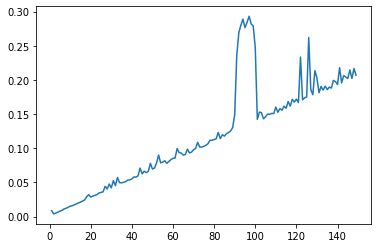

In [ ]:
import time
import matplotlib.pyplot as plt

r = range(1, 150)
times = []
mask = lambda dni, m : "".join([str(int(dni[i])*int(m[i])) for i in range(len(dni))])
for k in r:
    t1 = time.time()
    dnis = [f"{random.randrange(100000000):08}" for _ in range(k)]
    l = sorted((i for i in (f'{a:08b}' for a in range(2**8)) if len(set(mask(j,i) for j in dnis))==len(dnis)), key=lambda x:sum(map(int,x)))              
    t2 = time.time()
    times.append(t2-t1)

plt.plot(list(r), times)

Variando el número de DNIs se obtiene un incremento lineal de coste temporal, mientras que variando la longitud de cada uno, el incremento es exponencial con base 2.

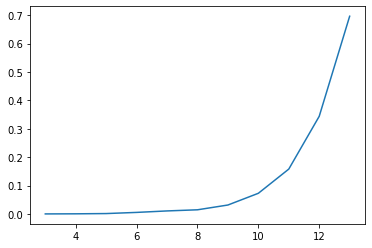

In [ ]:
r = range(3,14)
times = []
mask = lambda dni, m : "".join([str(int(dni[i])*int(m[i])) for i in range(len(dni))])
for k in r:
    t1 = time.time()
    dnis = [f"{random.randrange(100000000//1000000):0{k}d}" for _ in range(10)]
    l = sorted((i for i in (f'{i:0{k}b}' for i in range(2**k)) if len(set(mask(j,i) for j in dnis))==len(dnis)), key=lambda x : sum(map(int,x)))
    t2 = time.time()
    times.append(t2-t1)

plt.plot(list(r), times)

Call Graph del proceso

In [ ]:
!pip install pycallgraph

In [7]:
from pycallgraph import PyCallGraph
from pycallgraph.output import GraphvizOutput

graph = GraphvizOutput()
graph.output_file = "file4.png"

with PyCallGraph(output=graph):
  mask = lambda dni, m : "".join([str(int(dni[i])*int(m[i])) for i in range(len(dni))])
  print(sorted((i for i in (f'{a:08b}' for a in range(2**8)) if len(set(mask(j,i) for j in dnis))==len(dnis)), key=lambda x:sum(map(int,x))))

['00011101', '00101101', '00101110', '00110110', '01001110', '01101001', '01110100', '10110010', '10110100', '10111000', '11000110', '11110000', '00011111', '00101111', '00110111', '00111011', '00111101', '00111110', '01001111', '01011011', '01011101', '01011110', '01100111', '01101011', '01101101', '01101110', '01110011', '01110101', '01110110', '01111001', '01111010', '01111100', '10011101', '10011110', '10101011', '10101101', '10101110', '10110011', '10110101', '10110110', '10111001', '10111010', '10111100', '11000111', '11001011', '11001101', '11001110', '11010011', '11010101', '11010110', '11011001', '11011100', '11100011', '11100110', '11101001', '11101010', '11101100', '11110001', '11110010', '11110100', '11111000', '00111111', '01011111', '01101111', '01110111', '01111011', '01111101', '01111110', '10011111', '10101111', '10110111', '10111011', '10111101', '10111110', '11001111', '11010111', '11011011', '11011101', '11011110', '11100111', '11101011', '11101101', '11101110', '11

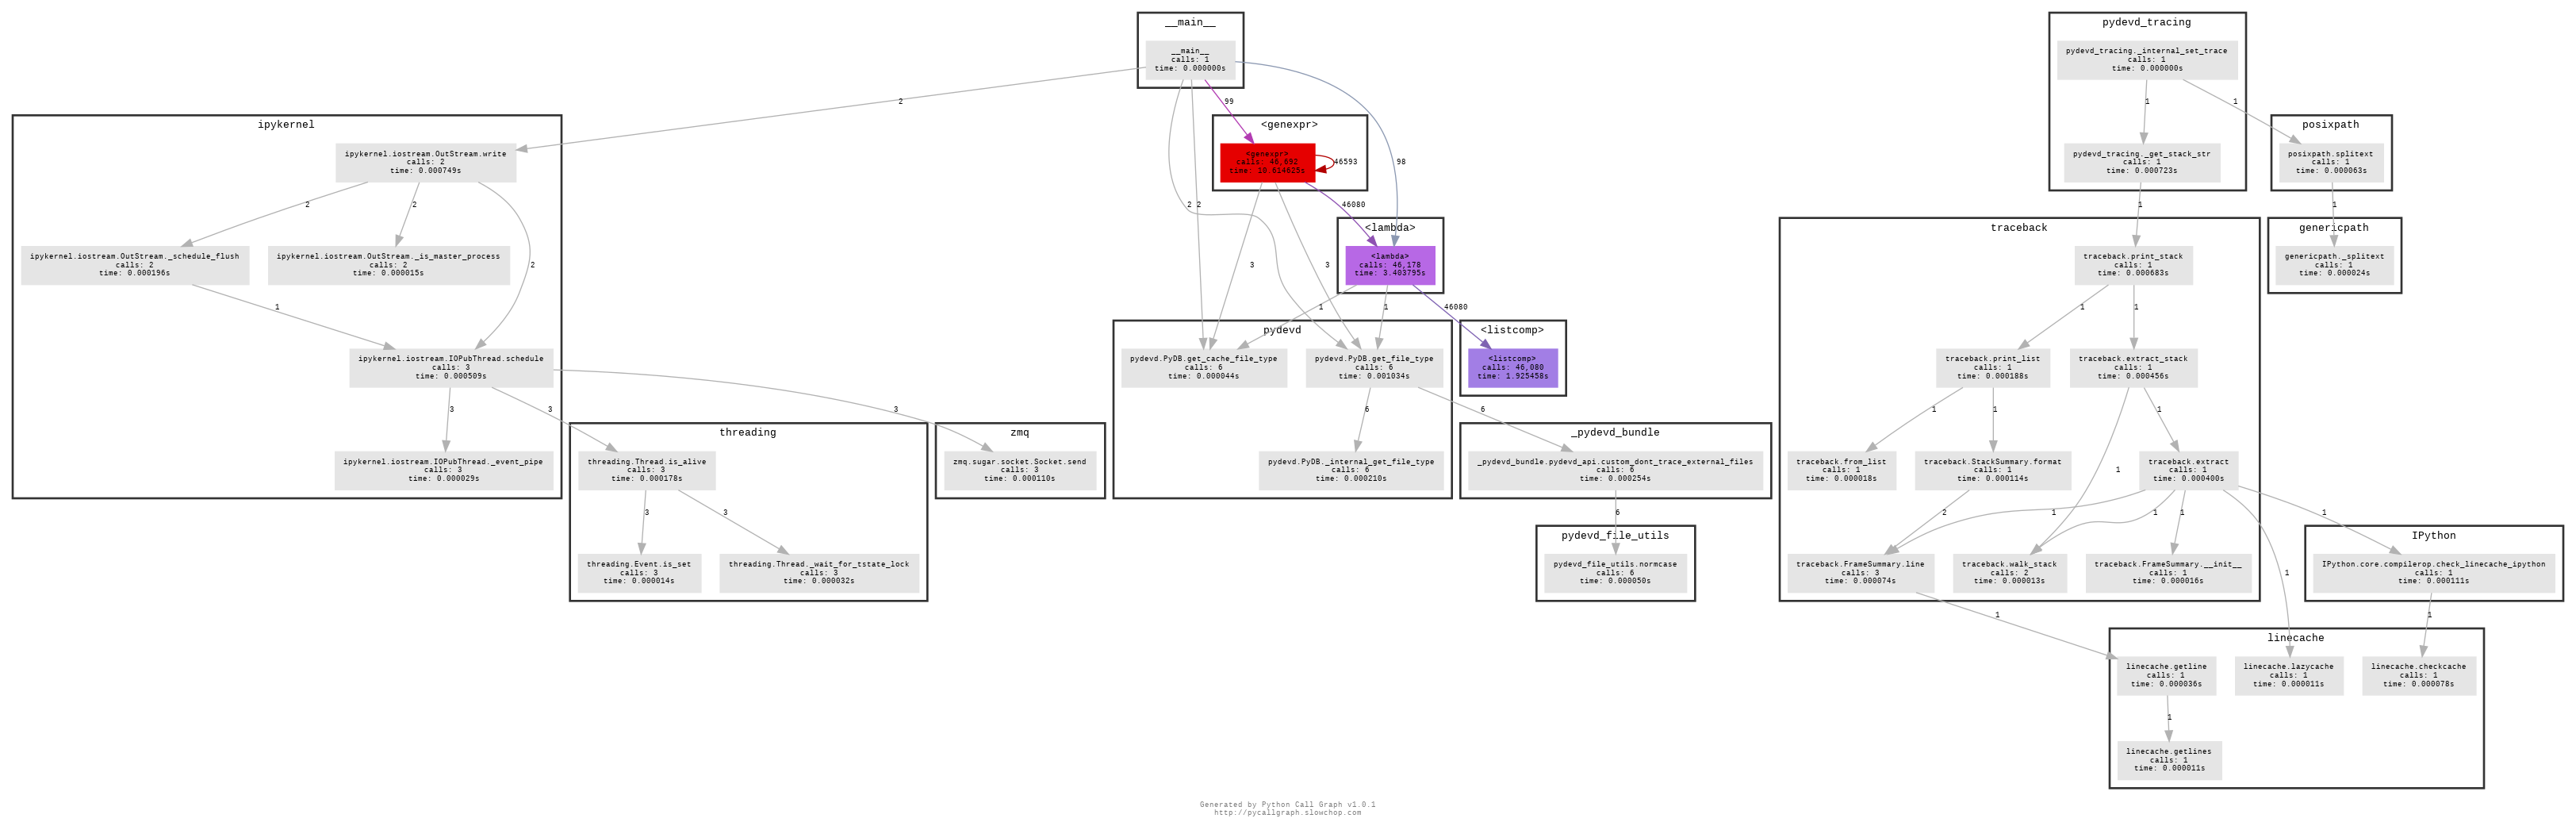

In [5]:
import cv2
from google.colab.patches import cv2_imshow
cv2_imshow(cv2.imread("file4.png"))

Call Graph del código (estático)

In [ ]:
!pip install pycg
!pip install pyvis==0.3.1

In [2]:
!pycg file.py -o cg.json

In [3]:
import networkx as nx
from pyvis.network import Network
import json

def toNetwork(data: dict)->  nx.DiGraph:
    nt = nx.DiGraph()

    def checkKey(name):
        if name not in nt:
            nt.add_node(name, size=40)

    for node in data:
        checkKey(node)
        for child in data[node]:
            checkKey(child)
            nt.add_edge(node,child)
    return nt

def ntw_pyvis(ntx:nx.DiGraph):
    net = Network(width="1000px",height="1000px", directed=True)
    for node in ntx.nodes:
        net.add_node(node, **{"label":node},)

    for edge in ntx.edges:
        net.add_edge(edge[0], edge[1], width=1)
    net.show('graph.html')

with open("cg.json","r") as f:
    data = json.load(f)

ntw_pyvis(toNetwork(data))